In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from auxiliary import plot_boundary, plot_svm_margins
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

# Support Vector Machines
## Maximal Margin Classifier (hard-margin)

Vamos a empezar a entrenar el modelo SVM como clasificador (SVC), con datos sintéticos.
Usamos un caso linealmente separable.

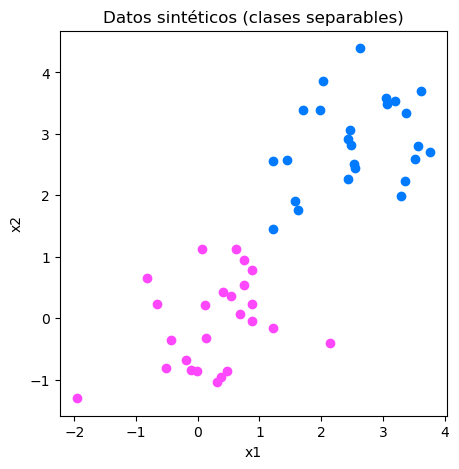

In [2]:
rng = np.random.default_rng(seed=42)

X = rng.standard_normal((50, 2)) 
y = np.array([-1]*25+[1]*25)
Xsep = X.copy()
Xsep[y==1] += 2.9 # desplazamos la clase azul hacia la derecha

fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(Xsep[:25,0], Xsep[:25,1], c="#ff48fd")
ax.scatter(Xsep[25:,0], Xsep[25:,1], c="#007aff")
ax.set_title('Datos sintéticos (clases separables)')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

Creamos un modelo SVC usando [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Definimos el caso lineal con un valor de C muy grande, adecuando para clases separables.


In [3]:
svm_separable = SVC(C=1e5, kernel='linear')
svm_separable.fit(Xsep, y)

SVC(C=100000.0, kernel='linear')

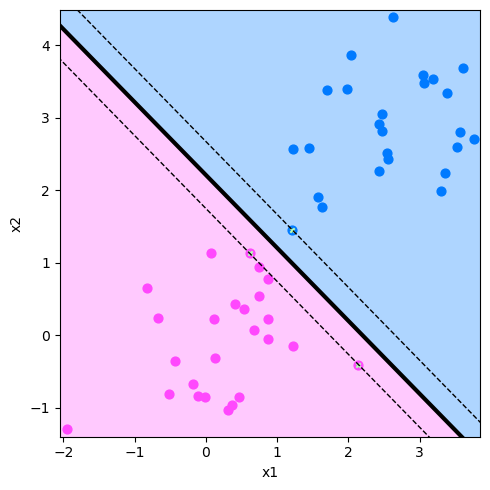

In [4]:
plot_boundary(Xsep, y, svm_separable, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)


# Grafiquemos los vectores de soporte
plt.scatter(svm_separable.support_vectors_[:,0], svm_separable.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(Xsep, svm_separable)

plt.tight_layout();

Con SVC lineales podemos obtener los coeficientes de la recta de decisión:

In [5]:
svm_separable.coef_

array([[2.17631472, 2.16304641]])

In [6]:
svm_separable.support_vectors_

array([[ 2.1416476 , -0.40641502],
       [ 0.61597942,  1.12897229],
       [ 1.21266557,  1.45288753]])

Con esto podemos predecir la clase de un set de testeo.

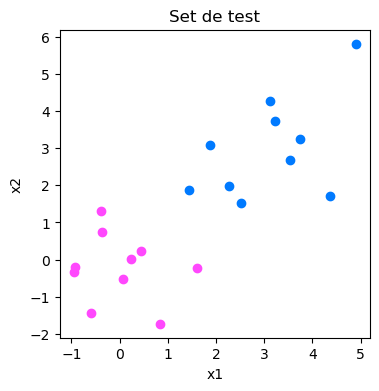

In [7]:
X_test = rng.standard_normal((20, 2)) 
y_test = np.array([-1]*10+[1]*10) 
X_test[y_test==1] += 2.9 # desplazamos la clase azul hacia la derecha

fig, ax = plt.subplots(figsize=(4, 4)) 
ax.scatter(X_test[:10,0], X_test[:10,1], c="#ff48fd")
ax.scatter(X_test[10:,0], X_test[10:,1], c="#007aff")
ax.set_title('Set de test')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

Evaluamos usando la matriz de confusión.

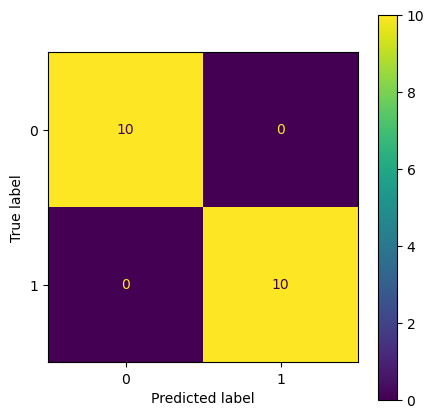

In [8]:
y_pred = svm_separable.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=svm_separable.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

---
## Clasificador de vector de soporte (soft-margin) 

Ahora usamos un caso que no es linealmente separable.

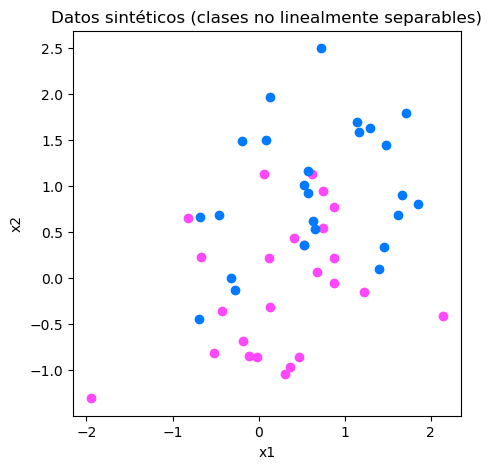

In [9]:
rng = np.random.default_rng(seed=42)

X = rng.standard_normal((50, 2)) 
y = np.array([-1]*25+[1]*25)
X[y==1] += 1 # Sumamos uno a la clase azul para desplazarlo 

fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(X[:25,0], X[:25,1], c="#ff48fd")
ax.scatter(X[25:,0], X[25:,1], c="#007aff")
ax.set_title('Datos sintéticos (clases no linealmente separables)')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

Entrenamos con los mismos parámetros que antes.

In [10]:
svm_linear = SVC(C=1e5, kernel='linear')
svm_linear.fit(X, y)

SVC(C=100000.0, kernel='linear')

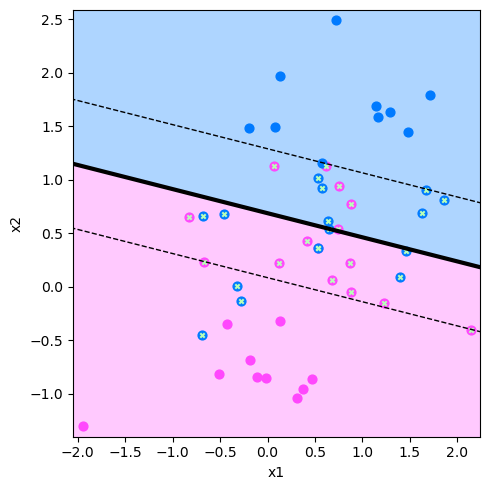

In [11]:
plot_boundary(X, y, svm_linear, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_linear.support_vectors_[:,0], svm_linear.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X, svm_linear)

plt.tight_layout();

Veamos entrenar el modelo con un parámetro más chico C=10

In [12]:
svm_linear_small = SVC(C=10, kernel='linear')
svm_linear_small.fit(X, y)

SVC(C=10, kernel='linear')

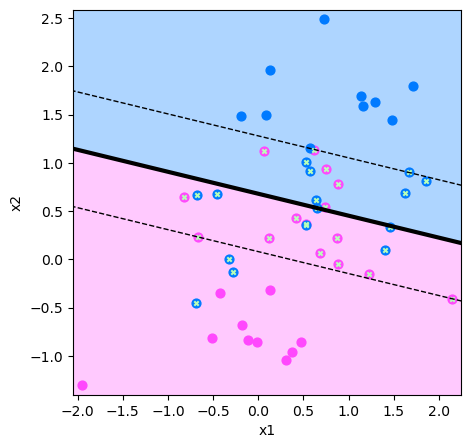

In [13]:
plot_boundary(X, y, svm_linear_small, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_linear_small.support_vectors_[:,0], svm_linear_small.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X, svm_linear_small)

Con SVC lineales podemos obtener los coeficientes de la recta de decisión:

In [14]:
svm_linear_small.coef_

array([[0.37943953, 1.66730076]])

Aprovechemos este caso sencillo para hacer una optimización del hiperparámetro C usando [Grid Search](https://scikit-learn.org/stable/modules/grid_search.html#grid-search).

Con el parámetro refit=True de GridSearchCV ya le decimos que lo entrene.

In [15]:
from sklearn.model_selection import GridSearchCV

svm_linear = SVC(kernel='linear')

grid = GridSearchCV(svm_linear,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

Vemos que el mejor valor es cuando C=0.1

In [16]:
grid.best_params_

{'C': 0.1}

Podemos chusmear las métricas para cada caso:

In [17]:
grid.cv_results_['mean_test_score']

array([0.7 , 0.7 , 0.76, 0.74, 0.68, 0.68, 0.7 ])

In [18]:
grid.cv_results_['std_test_score']

array([0.08944272, 0.08944272, 0.10198039, 0.10198039, 0.04      ,
       0.04      , 0.06324555])

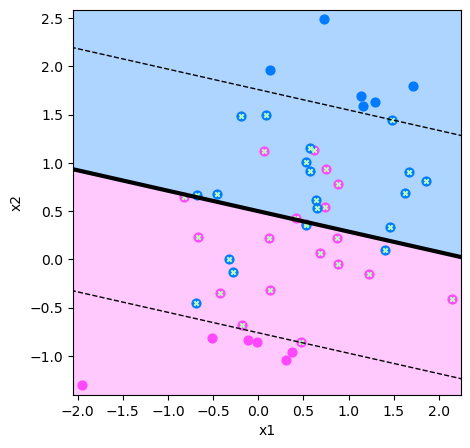

In [19]:
# No necesitamos entrenar el modelo porque con el parámetro refit de GridSearchCV ya lo entrenó por nosotros
svm_best = grid.best_estimator_

plot_boundary(X, y, svm_best, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_best.support_vectors_[:,0], svm_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X, svm_best)

Con esto podemos predecir la clase de un set de testeo.

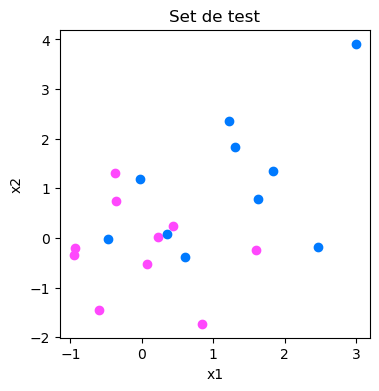

In [20]:
X_test = rng.standard_normal((20, 2)) 
y_test = np.array([-1]*10+[1]*10) 
X_test[y_test==1] += 1

fig, ax = plt.subplots(figsize=(4,4)) 
ax.scatter(X_test[:10,0], X_test[:10,1], c="#ff48fd")
ax.scatter(X_test[10:,0], X_test[10:,1], c="#007aff")
ax.set_title('Set de test')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

In [21]:
y_pred = svm_best.predict(X_test)

Evaluamos usando la matriz de confusión.

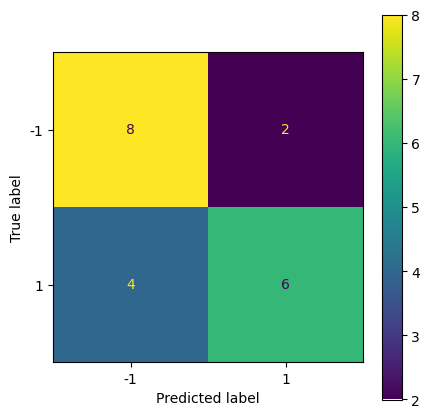

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=svm_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [23]:
from sklearn.metrics import accuracy_score

print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")

El porcentaje de exactitud es de: 70%


---
## Uso de funciones Kernels

Veamos ahora cuando clasificamos con un modelo con una frontera de decisión no lineal usando una función kernel. 

Empezamos con la función kernel polinómica, que tenemos como hiperparámetro, además de la C, el orden del polinomio, que en [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) se pasa como el argumento **gamma**. 

Pero primero vamos a realizar una búsqueda de posibles hiper-parámetro, tanto para C como para gamma usando **gridsearchCV**.

In [24]:
svm_poly = SVC(kernel='poly')

grid = GridSearchCV(svm_poly,
                    {'C': [1, 5, 10], 'degree': [2, 3, 4, 5]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 5, 10], 'degree': [2, 3, 4, 5]},
             scoring='accuracy')

In [25]:
# Vemos todos los datos de la búsqueda como Dataframe que nos facilita la visualización.
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.000794,0.000055,0.000775,0.000025,1,5,"{'C': 1, 'degree': 5}",0.7,0.8,0.8,0.7,0.7,0.74,0.048990,1
11,0.000722,0.000032,0.000671,0.000024,10,5,"{'C': 10, 'degree': 5}",0.8,0.7,0.8,0.7,0.7,0.74,0.048990,1
1,0.000742,0.000020,0.000792,0.000067,1,3,"{'C': 1, 'degree': 3}",0.7,0.8,0.8,0.7,0.6,0.72,0.074833,3
5,0.000748,0.000020,0.000740,0.000008,5,3,"{'C': 5, 'degree': 3}",0.7,0.6,0.8,0.7,0.7,0.70,0.063246,4
9,0.000699,0.000070,0.000658,0.000005,10,3,"{'C': 10, 'degree': 3}",0.7,0.6,0.8,0.7,0.7,0.70,0.063246,4
2,0.000783,0.000050,0.000755,0.000012,1,4,"{'C': 1, 'degree': 4}",0.6,0.8,0.8,0.6,0.6,0.68,0.097980,6
7,0.000755,0.000043,0.000738,0.000016,5,5,"{'C': 5, 'degree': 5}",0.8,0.7,0.8,0.5,0.6,0.68,0.116619,7
6,0.000812,0.000050,0.000733,0.000007,5,4,"{'C': 5, 'degree': 4}",0.6,0.7,0.8,0.6,0.6,0.66,0.080000,8
0,0.000784,0.000067,0.000801,0.000083,1,2,"{'C': 1, 'degree': 2}",0.6,0.6,0.9,0.5,0.6,0.64,0.135647,9
4,0.000742,0.000009,0.000763,0.000027,5,2,"{'C': 5, 'degree': 2}",0.6,0.6,0.9,0.5,0.6,0.64,0.135647,9


In [26]:
grid.best_params_

{'C': 1, 'degree': 5}

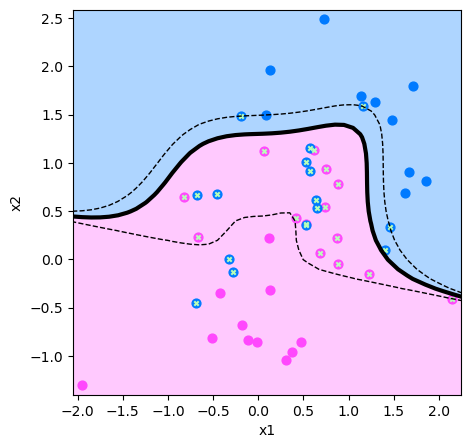

In [27]:
svm_poly_best = grid.best_estimator_

plot_boundary(X, y, svm_poly_best, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)
# Grafiquemos los vectores de soporte
plt.scatter(svm_poly_best.support_vectors_[:,0], svm_poly_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X, svm_poly_best)

Otro tipo de función de kernel que vimos es la radial. Habíamos visto en clase que teníamos el hiper-parámetro gamma. Si usamos esta función en [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function), podemos pasar el argumento como **gamma**, al igual que el caso de kernel polinomial.

Para probar este kernel vamos a usar otro dataset sintético.

In [28]:
from sklearn.model_selection import train_test_split

X = rng.standard_normal((200, 2)) 
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size=0.5, random_state=0)

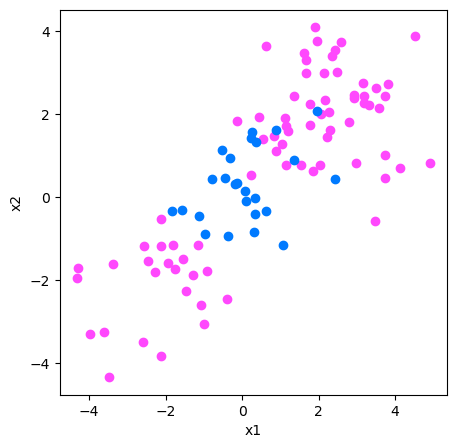

In [29]:
fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], c="#ff48fd")
ax.scatter(X_train[y_train==2][:,0], X_train[y_train==2][:,1], c="#007aff")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

Primero vamos a realizar una búsqueda de posibles hiper-parámetros, tanto para C como para gamma usando **gridsearchCV**.

In [30]:
svm_kbf = SVC(kernel='rbf')

grid = GridSearchCV(svm_kbf,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
                     "gamma": [0.5, 1, 2, 3, 4]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.5, 1, 2, 3, 4]},
             scoring='accuracy')

In [31]:
grid.best_params_

{'C': 5, 'gamma': 0.5}

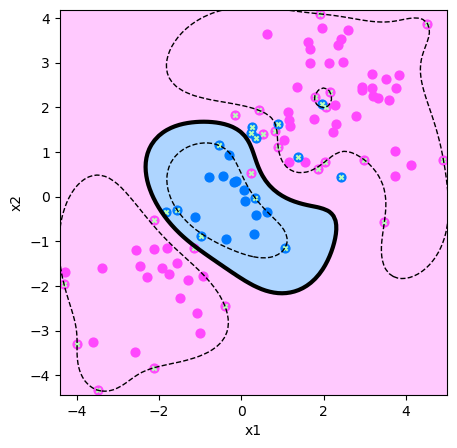

In [32]:
svm_rbf_best = grid.best_estimator_

plot_boundary(X_train, y_train, svm_rbf_best, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=40)

# Grafiquemos los vectores de soporte
plt.scatter(svm_rbf_best.support_vectors_[:,0], svm_rbf_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decisión
plot_svm_margins(X_train, svm_rbf_best)

Podemos evaluar el modelo con el set de testeo.

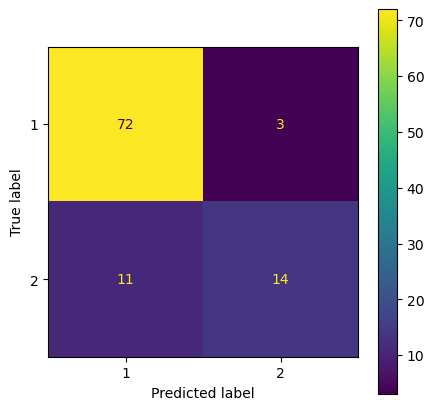

In [33]:
y_pred = svm_rbf_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=svm_rbf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf_best.classes_)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [34]:
print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")

El porcentaje de exactitud es de: 86%


----

## Clasificación de multi-clase con SVM

El modelo [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) implementado por sklearn nos permite realizar clasificación de multiclase en cualquier de las dos clases que vimos. Para ello tenemos el atributo *decision_function_shape* que puede tomar dos formas:

- 'ovo': Estrategia One vs one
- 'ovr': Estrategia One vs rest (One vs all).

Creemos una data sintética para este caso:

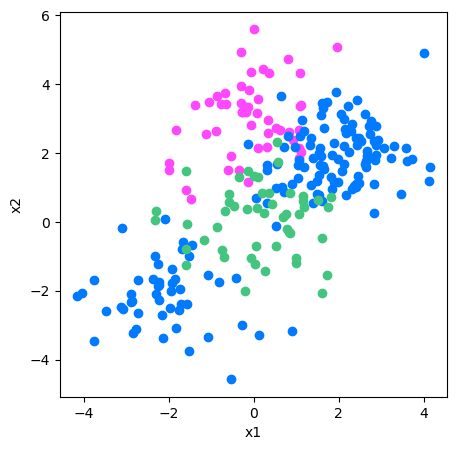

In [35]:
rng = np.random.default_rng(42)

X = rng.standard_normal((200, 2)) 
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

X = np.vstack([X, rng.standard_normal((50, 2))]) 
y = np.hstack([y, [0]*50])
X[y==0,1] += 3

fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(X[y==0][:,0], X[y==0][:,1], c="#ff48fd")
ax.scatter(X[y==1][:,0], X[y==1][:,1], c="#007aff")
ax.scatter(X[y==2][:,0], X[y==2][:,1], c="#44c57f")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

Entrenamos el modelo con un kernel RBF y una estrategia one-vs-one.

In [36]:
svm_rbf_3 = SVC(kernel="rbf", C=1, gamma=0.1, decision_function_shape='ovo', probability=True); 
svm_rbf_3.fit(X, y)

SVC(C=1, decision_function_shape='ovo', gamma=0.1, probability=True)

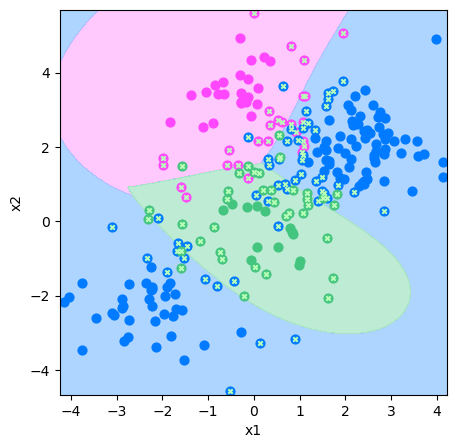

In [37]:
plot_boundary(X, y, svm_rbf_3, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff', "#a9e5c5"),
              colormap_points=('#ff48fd', '#007aff', "#44c57f"),
              label_point=(0, 1, 2),
              figsize=(5, 5),
              legend=False,
              point_size=40)

# Grafiquemos los vectores de soporte
plt.scatter(svm_rbf_3.support_vectors_[:,0], svm_rbf_3.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

Para entender cómo se arman las zonas de decisión, veamos las fronteras de decisión:

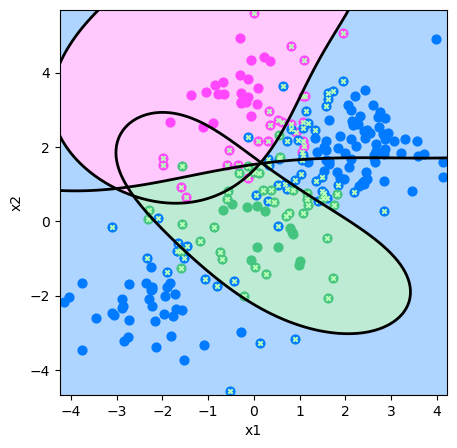

In [38]:
plot_boundary(X, y, svm_rbf_3, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff', "#a9e5c5"),
              colormap_points=('#ff48fd', '#007aff', "#44c57f"),
              label_point=(0, 1, 2),
              figsize=(5, 5),
              legend=False,
              point_size=40)

# Grafiquemos los vectores de soporte
plt.scatter(svm_rbf_3.support_vectors_[:,0], svm_rbf_3.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decisión
plot_svm_margins(X, svm_rbf_3, linewidths=[0, 2, 0])